In [1]:
import pandas as pd
import researchpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
facial = pd.read_csv('facial_similarity_reports.csv')
doc = pd.read_csv('doc_reports.csv')

In [3]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          176404 non-null  int64 
 1   user_id                             176404 non-null  object
 2   result                              176404 non-null  object
 3   visual_authenticity_result          150290 non-null  object
 4   image_integrity_result              176403 non-null  object
 5   face_detection_result               150261 non-null  object
 6   image_quality_result                176403 non-null  object
 7   created_at                          176404 non-null  object
 8   supported_document_result           175900 non-null  object
 9   conclusive_document_quality_result  95217 non-null   object
 10  colour_picture_result               95222 non-null   object
 11  data_validation_result              142

In [4]:
facial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Unnamed: 0                     176404 non-null  int64 
 1   user_id                        176404 non-null  object
 2   result                         176403 non-null  object
 3   face_comparison_result         166007 non-null  object
 4   created_at                     176404 non-null  object
 5   facial_image_integrity_result  175941 non-null  object
 6   visual_authenticity_result     150290 non-null  object
 7   properties                     176404 non-null  object
 8   attempt_id                     176404 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.1+ MB


In [5]:
doc['result'].value_counts()

clear       132402
consider     44002
Name: result, dtype: int64

In [6]:
facial['result'].value_counts()

clear       165486
consider     10917
Name: result, dtype: int64

In [7]:
print(f'df_face length: {facial.shape}\ndf_doc: {doc.shape}')
# same length. 

df_face length: (176404, 9)
df_doc: (176404, 19)


In [8]:
facial['user_id'].equals(doc['user_id'])

True

In [1]:
df_merged = pd.merge(doc, facial, how='inner', on = ['user_id', 'id'])
df_merged.to_csv('merged_data/merged.csv', index=False)

NameError: name 'pd' is not defined

In [10]:
df_merged.shape

(176403, 26)

In [11]:
doc['user_id'].equals(df_merged['user_id'])

False

In [12]:
doc['attempt_id'].equals(df_merged['attempt_id'])

False

In [13]:
doc['sub_result'].value_counts()

clear        132402
rejected      26090
caution       15992
suspected      1920
Name: sub_result, dtype: int64

clear:	If all underlying verifications pass, the overall sub result will be clear.

rejected:	If the report has returned information where the check cannot be processed further (poor quality image or an unsupported document).

suspected:	If the document that is analysed is suspected to be fraudulent.

caution:	If any other underlying verifications fail but they don’t necessarily point to a fraudulent document (such as the name provided by the applicant doesn’t match the one on the document)

In [14]:
temp = doc.groupby(['created_at'])['result'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [15]:
temp.to_csv('temp.csv')

In [16]:
rejected = doc[doc['sub_result'] == 'rejected']
rejected.to_csv('rejected.csv', index=False)

In [17]:
temp = rejected.groupby(['created_at'])['result'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [18]:
temp.to_csv('temp.csv')

In [19]:
suspected = doc[doc['sub_result'] == 'suspected']
suspected.to_csv('suspected.csv', index=False)
suspected.describe()

,Unnamed: 0
count,1920.000000
mean,88512.316667
std,47378.809604
min,74.000000
25%,54881.000000
50%,94241.000000
75%,126238.500000
max,180838.000000


In [20]:
caution = doc[doc['sub_result'] == 'caution']
caution.to_csv('caution.csv', index=False)

In [21]:
caution['conclusive_document_quality_result'].value_counts(dropna=False)

consider    13386
NaN          1483
clear        1123
Name: conclusive_document_quality_result, dtype: int64

In [22]:
suspected['conclusive_document_quality_result'].value_counts(dropna=False)

clear       1530
NaN          211
consider     179
Name: conclusive_document_quality_result, dtype: int64

In [23]:
rejected['conclusive_document_quality_result'].value_counts(dropna=False)

NaN    26090
Name: conclusive_document_quality_result, dtype: int64

In [24]:
suspected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 74 to 175250
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          1920 non-null   int64 
 1   user_id                             1920 non-null   object
 2   result                              1920 non-null   object
 3   visual_authenticity_result          1920 non-null   object
 4   image_integrity_result              1920 non-null   object
 5   face_detection_result               1920 non-null   object
 6   image_quality_result                1920 non-null   object
 7   created_at                          1920 non-null   object
 8   supported_document_result           1920 non-null   object
 9   conclusive_document_quality_result  1709 non-null   object
 10  colour_picture_result               1709 non-null   object
 11  data_validation_result              1860 non-null   o

In [25]:
suspected['compromised_document_result'].value_counts(dropna=False)

NaN         1146
clear        751
consider      23
Name: compromised_document_result, dtype: int64

In [26]:
caution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15992 entries, 0 to 176370
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          15992 non-null  int64 
 1   user_id                             15992 non-null  object
 2   result                              15992 non-null  object
 3   visual_authenticity_result          15970 non-null  object
 4   image_integrity_result              15992 non-null  object
 5   face_detection_result               15967 non-null  object
 6   image_quality_result                15992 non-null  object
 7   created_at                          15992 non-null  object
 8   supported_document_result           15992 non-null  object
 9   conclusive_document_quality_result  14509 non-null  object
 10  colour_picture_result               14509 non-null  object
 11  data_validation_result              15584 non-null  o

In [27]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26090 entries, 711 to 176194
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          26090 non-null  int64 
 1   user_id                             26090 non-null  object
 2   result                              26090 non-null  object
 3   visual_authenticity_result          0 non-null      object
 4   image_integrity_result              26090 non-null  object
 5   face_detection_result               0 non-null      object
 6   image_quality_result                26090 non-null  object
 7   created_at                          26090 non-null  object
 8   supported_document_result           25589 non-null  object
 9   conclusive_document_quality_result  0 non-null      object
 10  colour_picture_result               0 non-null      object
 11  data_validation_result              3 non-null     

In [28]:
merged_rejected = pd.merge(rejected, facial, how='inner', on = ['user_id', 'attempt_id'])
merged_rejected.to_csv('merged_data/merged_rejected.csv', index=False)

In [29]:
merged_suspected = pd.merge(suspected, facial, how='inner', on = ['user_id', 'attempt_id'])
merged_suspected.to_csv('merged_data/merged_suspected.csv', index=False)

In [30]:
merged_caution = pd.merge(caution, facial, how='inner', on = ['user_id', 'attempt_id'])
merged_caution.to_csv('merged_data/merged_caution.csv', index=False)

In [31]:
params = ['visual_authenticity_result_x','image_integrity_result','face_detection_result','image_quality_result','supported_document_result','conclusive_document_quality_result','colour_picture_result','data_validation_result','police_record_result','compromised_document_result','face_comparison_result','facial_image_integrity_result','visual_authenticity_result_y']
len(params)

13

In [32]:
merged_suspected.shape

(1920, 26)

In [33]:
liste = []
for param in params:
    print(merged_suspected[param].value_counts(dropna=False))

consider    1592
clear        328
Name: visual_authenticity_result_x, dtype: int64
clear       1705
consider     215
Name: image_integrity_result, dtype: int64
clear       1896
consider      24
Name: face_detection_result, dtype: int64
clear    1920
Name: image_quality_result, dtype: int64
clear    1920
Name: supported_document_result, dtype: int64
clear       1530
NaN          211
consider     179
Name: conclusive_document_quality_result, dtype: int64
clear       1670
NaN          211
consider      39
Name: colour_picture_result, dtype: int64
clear       1460
consider     400
NaN           60
Name: data_validation_result, dtype: int64
clear       1822
NaN           73
consider      25
Name: police_record_result, dtype: int64
NaN         1146
clear        751
consider      23
Name: compromised_document_result, dtype: int64
clear       1645
NaN          269
consider       6
Name: face_comparison_result, dtype: int64
clear       1651
consider     176
NaN           93
Name: facial_image_i

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing 

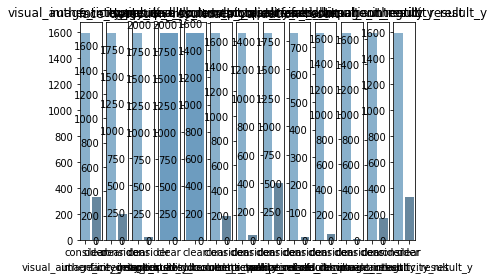

In [41]:
temp = 1
for param in params:
    param_count  = merged_suspected[param].value_counts(dropna=False)
    #param_count = param_count[:10,]
    #plt.figure(figsize=(10,5))
    plt.subplot(1,13,temp)
    sns.barplot(param_count.index, param_count.values, alpha=0.8, palette='Blues_d')
    #sns.set_context('paper')
    #plt.plot.bar(param_count.index, param_count.values)
    plt.title(param_count.name)
    plt.xlabel(param)
    temp = temp + 1

plt.autoscale(enable=True)
plt.tight_layout()
plt.show()
plt.close('all')

In [35]:
merged_rejected[params[0]].values

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [36]:
for param in params:
    param_count = merged_suspected[param].value_counts(dropna=False)
    print(f'Check: {merged_suspected[param].name}, Values: {param_count.values} Index: {param_count.index}')

Check: visual_authenticity_result_x, Values: [1592  328] Index: Index(['consider', 'clear'], dtype='object')
Check: image_integrity_result, Values: [1705  215] Index: Index(['clear', 'consider'], dtype='object')
Check: face_detection_result, Values: [1896   24] Index: Index(['clear', 'consider'], dtype='object')
Check: image_quality_result, Values: [1920] Index: Index(['clear'], dtype='object')
Check: supported_document_result, Values: [1920] Index: Index(['clear'], dtype='object')
Check: conclusive_document_quality_result, Values: [1530  211  179] Index: Index(['clear', nan, 'consider'], dtype='object')
Check: colour_picture_result, Values: [1670  211   39] Index: Index(['clear', nan, 'consider'], dtype='object')
Check: data_validation_result, Values: [1460  400   60] Index: Index(['clear', 'consider', nan], dtype='object')
Check: police_record_result, Values: [1822   73   25] Index: Index(['clear', nan, 'consider'], dtype='object')
Check: compromised_document_result, Values: [1146  7

In [37]:
temp = []
temp1 = []
for param in params:
    param_count = merged_suspected[param].value_counts(dropna=False)
    temp.append(param_count.values)
    temp1.append(param_count.index)

In [38]:
temp

[array([1592,  328]),
 array([1705,  215]),
 array([1896,   24]),
 array([1920]),
 array([1920]),
 array([1530,  211,  179]),
 array([1670,  211,   39]),
 array([1460,  400,   60]),
 array([1822,   73,   25]),
 array([1146,  751,   23]),
 array([1645,  269,    6]),
 array([1651,  176,   93]),
 array([1592,  328])]

In [39]:
for counter, index in zip(temp, temp1):
    print(counter, index)

[1592  328] Index(['consider', 'clear'], dtype='object')
[1705  215] Index(['clear', 'consider'], dtype='object')
[1896   24] Index(['clear', 'consider'], dtype='object')
[1920] Index(['clear'], dtype='object')
[1920] Index(['clear'], dtype='object')
[1530  211  179] Index(['clear', nan, 'consider'], dtype='object')
[1670  211   39] Index(['clear', nan, 'consider'], dtype='object')
[1460  400   60] Index(['clear', 'consider', nan], dtype='object')
[1822   73   25] Index(['clear', nan, 'consider'], dtype='object')
[1146  751   23] Index([nan, 'clear', 'consider'], dtype='object')
[1645  269    6] Index(['clear', nan, 'consider'], dtype='object')
[1651  176   93] Index(['clear', 'consider', nan], dtype='object')
[1592  328] Index(['consider', 'clear'], dtype='object')


In [40]:
temp

[array([1592,  328]),
 array([1705,  215]),
 array([1896,   24]),
 array([1920]),
 array([1920]),
 array([1530,  211,  179]),
 array([1670,  211,   39]),
 array([1460,  400,   60]),
 array([1822,   73,   25]),
 array([1146,  751,   23]),
 array([1645,  269,    6]),
 array([1651,  176,   93]),
 array([1592,  328])]

Index(['consider', 'clear'], dtype='object')

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


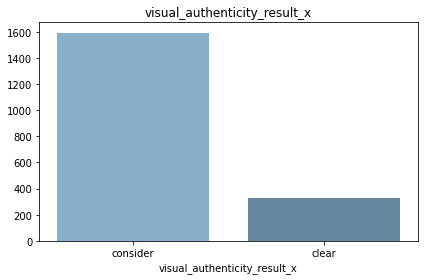

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


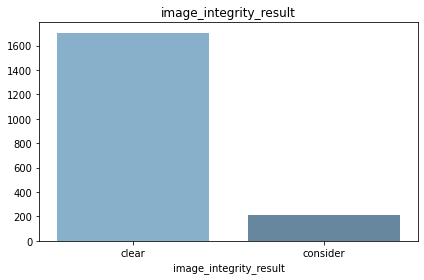

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


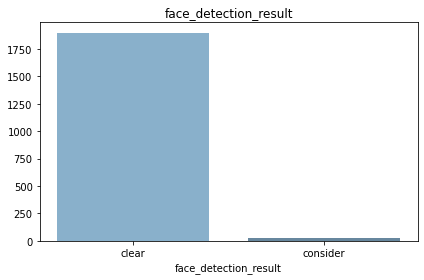

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


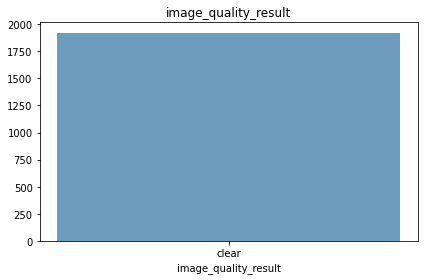

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


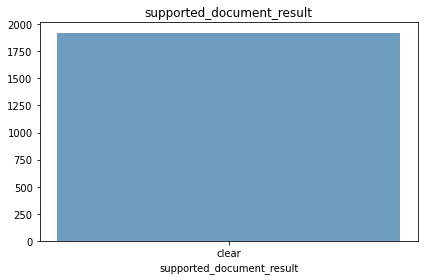

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


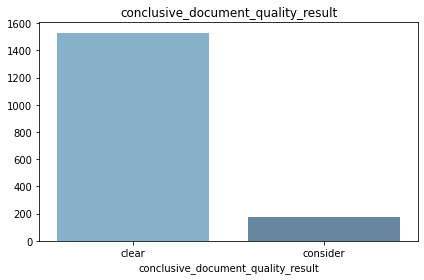

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


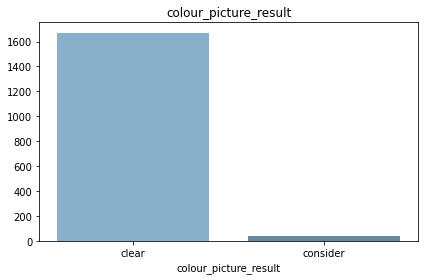

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


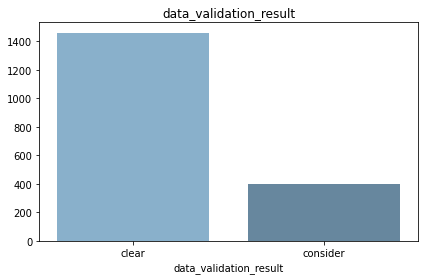

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


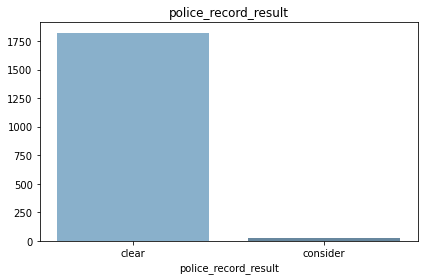

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


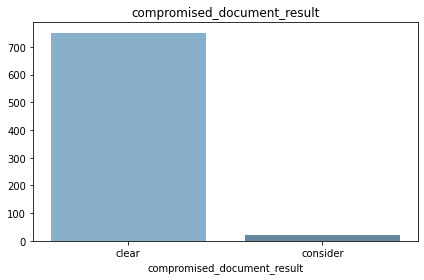

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


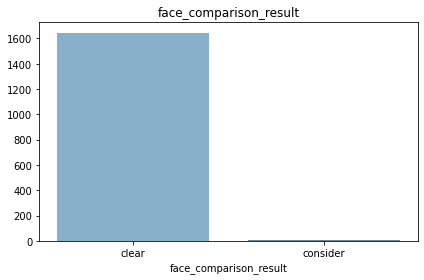

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


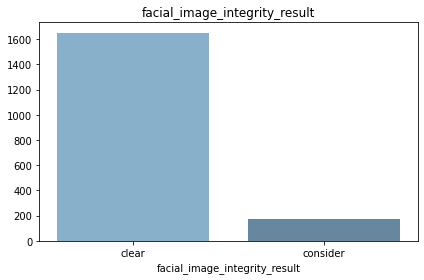

/Users/hakkarsama/.pyenv/versions/3.8.0/envs/masterarbeit/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


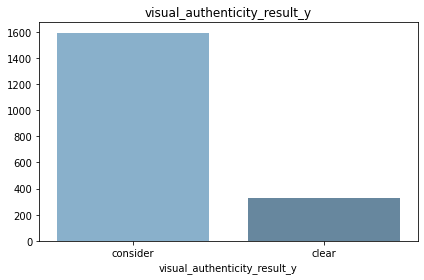

In [44]:
temp = 1
for param in params:
    param_count  = merged_suspected[param].value_counts(dropna=False)
    #param_count = param_count[:10,]
    #plt.figure(figsize=(10,5))
    #plt.subplot(1,13,temp)
    sns.barplot(param_count.index, param_count.values, alpha=0.8, palette='Blues_d')
    #sns.set_context('paper')
    #plt.plot.bar(param_count.index, param_count.values)
    plt.title(param_count.name)
    plt.xlabel(param)
    temp = temp + 1
    plt.autoscale(enable=True)
    plt.tight_layout()
    plt.show()
    plt.close('all')